# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 5
*gelöst von Stollmayer Max*

### Aufgabe 1

_Zu implementieren ist eine Finite-Differenzen-Methode für ein Randwertproblem $\begin{cases} u''(x)=f(x), \ x \in [a,b] \\ u(a)=u_a, \ u(b)=u_b \end{cases}.$_

#### Konstruktion

Gegeben sei obiges Randwertproblem und ein gleichförmiges Gitter $[x_0 = a, x_1, \dots, x_n,\dots, x_{N-1}, x_N = b]$ mit Schrittweite $h.$ Für ein beliebiges $0 < n < N$ entwickeln wir folgende Taylor-Reihen und formen nach $u''$ um:

$$(+)\begin{cases}
    u(x_{n+1}) = u(x_n + h) = u(x_n) + h u'(x_n) + \frac{h^2}{2} u''(x_n) + \mathcal{O}(h^3) \\
    u(x_{n-1}) = u(x_n - h) = u(x_n) - h u'(x_n) + \frac{h^2}{2} u''(x_n) + \mathcal{O}(h^3)
\end{cases} \\
\iff u(x_{n+1}) + u(x_{n-1}) \approx 2 u(x_n) + h^2 u''(x_n) \\
\iff u''(x_n) \approx \frac{u(x_{n+1}) - 2 u(x_n) + u(x_{n-1})}{h^2}$$

Also gilt für das Verfahren an den inneren Gitterpunkten $\frac{u_{n-1} - 2u_n + u_{n+1}}{h^2} = f(x_n).$ Mit $u_0 := u_a$ und $u_N := u_b$ gilt für $n=1$ bzw. $n=N-1$ demnach $\frac{u_0 - 2u_1 + u_2}{h^2} = f(x_1) \iff \frac{-2u_1 + u_2}{h^2} = f(x_1) - \frac{u_a}{h^2}$ bzw. $\frac{u_{N-2} - 2u_{N-1}}{h^2} = f(x_{N-1}) - \frac{u_b}{h^2}.$ Das zu lösende System ist nun:

$$\frac{1}{h^2}
\begin{pmatrix}
    -2 & 1 & 0 & \cdots & 0 \\
    1 & -2 & 1 & \ddots & \vdots \\
    0 & 1 & \ddots & \ddots & 0 \\
    \vdots & \ddots & \ddots & \ddots & 1 \\
    0 & \cdots & 0 & 1 & -2
\end{pmatrix}
\begin{pmatrix}
    u_1 \\
    u_2 \\
    \vdots \\
    u_{N-2} \\
    u_{N-1}
\end{pmatrix}
=
\begin{pmatrix}
    f(x_1) - \frac{u_a}{h^2} \\
    f(x_2) \\
    \vdots \\
    f(x_{N-2}) \\
    f(x_{N-1}) - \frac{u_b}{h^2}
\end{pmatrix}$$

Da dies eine tridiagonale Matrix ist, verwenden wir in der kommenden Implementierung auch den Tridiagonal-Matrix-Algorithmus zum Lösen des Gleichungssystems. Zuerst betrachten wir aber noch die Konvergenz der Finiten-Differenzen-Methode.

#### Konvergenz



#### Implementierung

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)
plt.rc("axes", edgecolor="white")
plt.rc("legend", frameon=True, framealpha=0.8, facecolor="white", edgecolor="white")

In [6]:
def TDMA(T, y):
    '''
    The Tri-Diagonal-Matrix-Algorithm is a special case of Gaussian elimination for tridiagonal matrices.
    Returns solution x of T x = y.
    
    T ... tridiagonal matrix
    y ... vector
    '''
    
    n = len(y)
    
    if T.shape != (n, n):
        raise Exception(f"Input shapes are mismatched. Matrix: {T.shape}, Vector: ({n}).")
    
    for k in range(n):
        if np.allclose(T[k,k], 0):
            raise Exception(f"Matrix is (almost) zero on diagonal at Matrix[{k},{k}].")
    
    c = np.zeros(n-1)
    x = d = np.zeros(n)

    c[0] = T[0,1] / T[0,0]
    d[0] = y[0] / T[0,0]
    
    for k in range(1, n-1):
        c[k] = T[k,k+1] / (T[k,k] - c[k-1] * T[k+1,k])
        d[k] = (y[k] - d[k-1] * T[k+1,k]) / (T[k,k] - c[k-1] * T[k+1,k])
    
    d[n-1] = x[n-1] = (y[n-1] - d[n-2] * T[n-1,n-2]) / (T[n-1,n-1] - c[n-2] * T[n-1,n-2])
    
    for k in range(n-2,-1,-1):
        x[k] = d[k] - c[k] * x[k+1]
    
    return x

In [ ]:
def FDM(f, ua, ub, grid):
    '''
    Returns list of function values on the given equidistant grid
    using a finite difference method for second order ODE.
    
    
    f ...... function of ODE: u''(x) = f(x)
    ua ..... first boundary value
    ub ..... second boundary value
    grid ... discretized equidstant interval: [a, ..., x_n = a + n h, ..., b]
    '''
    
    grid = np.array(grid)
    N = len(grid)
    h = (grid[-1] - grid[0]) / N
    
    

In [7]:
def FDM(f, grid, ua, ub):
    '''
    Returns list of function values on the given grid using a finite difference method for second order ODE.
    
    
    f ...... function of ODE: u''(x) = f(x)
    grid ... discretized interval: [a = x_0, x_1, ..., x_{N-1}, b = x_N]
    ua ..... first boundary value
    ub ..... second boundary value
    '''
    
    grid = np.array(grid)
    N = len(grid)
    
    h = grid[1:] - grid[:-1]                      # h[i] = grid[i+1] - grid[i], i=0..N-2
    
    a = 1 / (h[1:-1] * h[2:])                     # a[i] = 1 / (h[i-1] * h[i]), i=2..N-2
    b = -(h[:-1] + h[1:]) / (h[:-1] * h[1:]**2)   # b[i] = -(h[i-1] + h[i]) / (h[i-1] * h[i]**2), i=1..N-2
    c = 1 / h[1:-1]**2                            # c[i] = 1 / h[i]**2, i=1..N-3
        
    y = f(grid[1:-1])                             # y[i] = f(grid[i]), i=1..N-2
    y[0] -= ua / (h[0] * h[1])
    y[-1] -= ub / h[-1]**2
    
    T = np.diagflat(a,-1) + np.diagflat(b) + np.diagflat(c,1)
    
    return np.array([ua, *TDMA(T, y), ub])

#### Test

$\begin{cases} u''(x) = -1, \ x \in [0,2] \\ u(0) = u(2) = 0 \end{cases}$
und davon sind die Fehler mithilfe der Maximumsnorm und die Konvergenzordnung ist zu bestimmen.

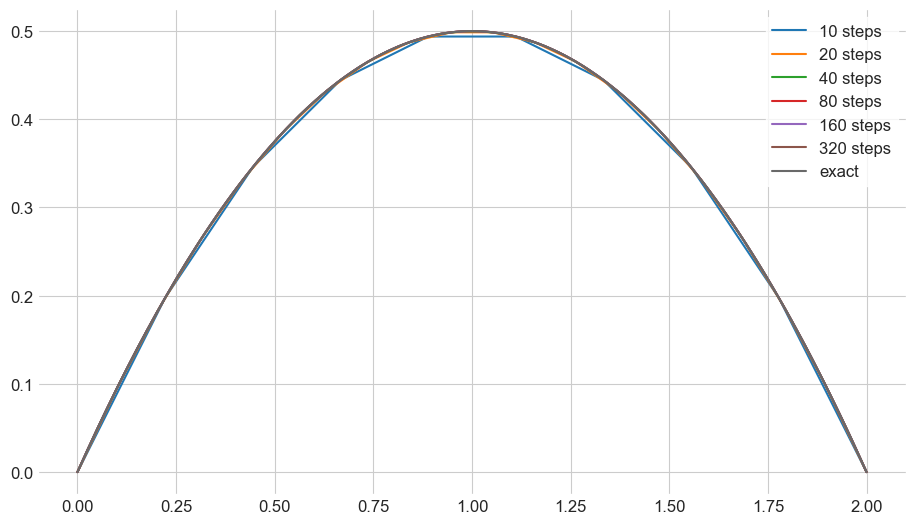

steps | errors
   10 | 9.992E-16
   20 | 1.332E-15
   40 | 3.275E-15
   80 | 4.308E-14
  160 | 3.497E-13
  320 | 5.828E-13

order:  -2


In [24]:
def f(x):
    return -x**0

def exact(x):
    return x - x**2 / 2

def error(exact_vals, approx_vals):
    '''Maxmimum norm'''
    return max(np.abs(exact_vals - approx_vals).flatten())

def order(errors):
    '''Approximation of order of convergence'''
    return np.log(errors[-1] / errors[0]) / np.log(steps[0] / steps[-1])

steps = 10 * 2**np.arange(6)
ua = ub = 0

errors = ()

for N in steps:
    grid = np.linspace(0, 2, N)
    
    u = FDM(f, grid, ua, ub)
    
    errors += (error(exact(grid), u),)
    
    plt.plot(grid, u, label=f"{N} steps")
    
plt.plot(grid, exact(grid), color="dimgray", label="exact")
plt.legend()
plt.show()

print("steps | errors")
for i in range(len(steps)):
    print(f"{steps[i]:5.0f} | {errors[i]:.3E}")
print(f"\norder: {order(errors):3.0f}")

Es scheint als würde der Fehler wachsen und das Verfahren divergieren, aber das kommt vermutlich aus der Summe der Rundungsfehler. Nach dem Plot sollte das Verfahren sehr gut konvergieren.

### Aufgabe 2

_Analog zu Aufgabe 1 für $\begin{cases} u''(x)=x,\ x \in [0,2]\\ u(0)=1,\ u(2)=2 \end{cases}.$_

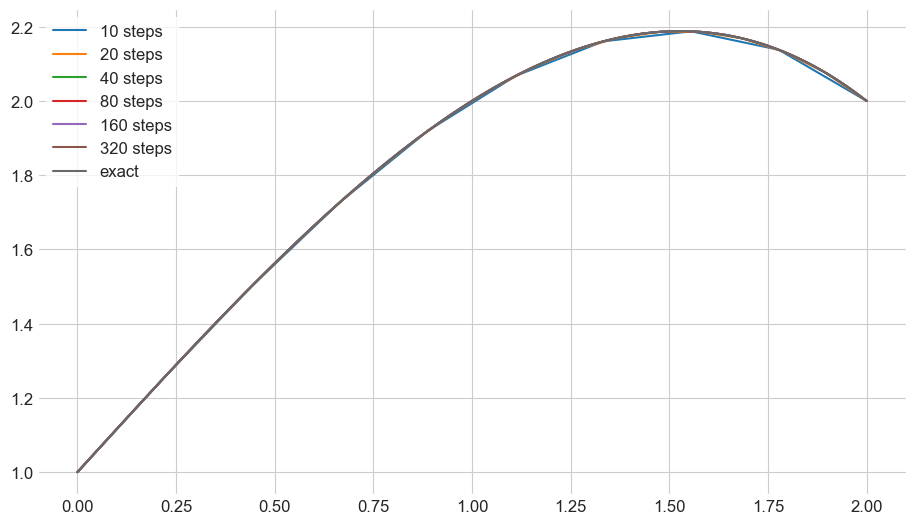

steps | errors
   10 | 3.997E-15
   20 | 1.021E-14
   40 | 1.332E-14
   80 | 1.794E-13
  160 | 1.653E-12
  320 | 2.389E-12

order:  -2


In [23]:
def f(x):
    return -x

def exact(x):
    return (-x**3 + 7*x + 6) / 6

def error(exact_vals, approx_vals):
    '''Maxmimum norm'''
    return max(np.abs(exact_vals - approx_vals).flatten())

def order(errors):
    '''Approximation of order of convergence'''
    return np.log(errors[-1] / errors[0]) / np.log(steps[0] / steps[-1])

steps = 10 * 2**np.arange(6)
ua = 1
ub = 2

errors = ()

for N in steps:
    grid = np.linspace(0, 2, N)
    
    u = FDM(f, grid, ua, ub)
    
    errors += (error(exact(grid), u),)
    
    plt.plot(grid, u, label=f"{N} steps")
    
plt.plot(grid, exact(grid), color="dimgray", label="exact")
plt.legend()
plt.show()

print("steps | errors")
for i in range(len(steps)):
    print(f"{steps[i]:5.0f} | {errors[i]:.3E}")
print(f"\norder: {order(errors):3.0f}")

Ebenso wie bei Augabe 1 scheint als würde der Fehler wachsen und das Verfahren divergieren, aber das kommt vermutlich aus der Summe der Rundungsfehler. Nach dem Plot sollte das Verfahren sehr gut konvergieren.